In [1]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import ShuffleSplit
import numpy as np
from sklearn import preprocessing
import seaborn as sb
from sklearn import metrics
from sklearn.metrics import accuracy_score


In [2]:
glassdf = pd.read_csv("glassdata.csv", delimiter=',', header=-1)

In [6]:
glassdf.columns = ['id', 'refractive_index', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'type']

ValueError: Length mismatch: Expected axis has 10 elements, new values have 11 elements

In [8]:
del glassdf['id']

glassdf.head()

,refractive_index,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [9]:
glassdf.columns

glassdf.groupby(glassdf.type).count()

#Quite a few examples of class 1, 2
#Not so many of the other classes

,refractive_index,Na,Mg,Al,Si,K,Ca,Ba,Fe
type,,,,,,,,,
1,70,70,70,70,70,70,70,70,70
2,76,76,76,76,76,76,76,76,76
3,17,17,17,17,17,17,17,17,17
5,13,13,13,13,13,13,13,13,13
6,9,9,9,9,9,9,9,9,9
7,29,29,29,29,29,29,29,29,29


Mean
      refractive_index         Na        Mg        Al         Si         K  \
type                                                                         
1             1.518718  13.242286  3.552429  1.163857  72.619143  0.447429   
2             1.518619  13.111711  3.002105  1.408158  72.598026  0.521053   
3             1.517964  13.437059  3.543529  1.201176  72.404706  0.406471   
5             1.518928  12.827692  0.773846  2.033846  72.366154  1.470000   
6             1.517456  14.646667  1.305556  1.366667  73.206667  0.000000   
7             1.517116  14.442069  0.538276  2.122759  72.965862  0.325172   

             Ca        Ba        Fe  
type                                 
1      8.797286  0.012714  0.057000  
2      9.073684  0.050263  0.079737  
3      8.782941  0.008824  0.057059  
5     10.123846  0.187692  0.060769  
6      9.356667  0.000000  0.000000  
7      8.491379  1.040000  0.013448  
Standard Deviation
      refractive_index        Na        Mg     

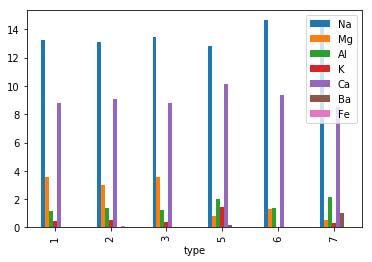

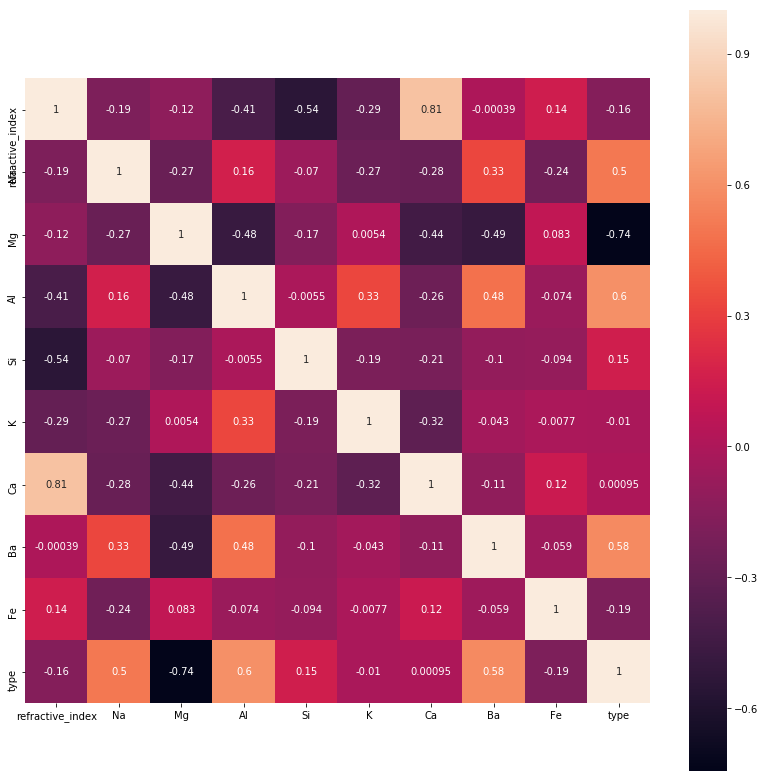

In [11]:
#We should look at the typical composition for each kind of glass.

coltoplot = ['Na', 'Mg', 'Al', 'K', 'Ca', 'Ba', 'Fe']
#we removed Si because it seems to dominate the composition for every glass


print("Mean")
print(glassdf.groupby(glassdf.type).mean())
print("Standard Deviation")
print(glassdf.groupby(glassdf.type).std())
glassdf[coltoplot].groupby(glassdf.type).mean().plot(kind='bar')

#for types in type_list:
 #   print("Type "+str(types))
  #  print(glassdf[glassdf.type==types].mean())
   # print(glassdf[glassdf.type==types].std())
    #glassdf[glassdf.type==types].mean().plot()
    #plt.tight_layout()
    
plt.figure(figsize=(14,14))
foo = sb.heatmap(glassdf.corr(), vmax=1, square = True, annot = True)    
#From this plot, we have noticed that correlation between Ca and type is very low.   
    
    

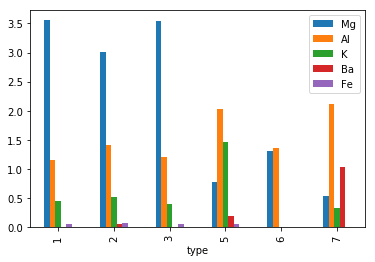

In [7]:
#Let's focus on the atoms that the weight is below 5 since the scale is so different
#They may be the determining factor in differentiating the kind of glass

coltoplot = ['Mg', 'Al', 'K', 'Ba', 'Fe']
glassdf[coltoplot].groupby(glassdf.type).mean().plot(kind='bar')


In [8]:
#A few conclusions from the plot above

#Types 1 and 3 seem on a first glance a bit hard to distiguish. Will require more examination

#Type 2 seems like it might just be distinguishable from type 1 and 3 based on Ba


#Type 7 seems to be characterized by higher amounts of Ba compared to every other type.

#Type 6 seems to be characterized by complete absence of K

#Type 5 seems to be characterized by lower amounts of Mg compared to all types
#except for type 7. To distinguish it from type 7, we also lok at Ba


In [9]:
#Based on the conclusions above, let's examine types 1, 2 and 3 more closely.
coltoplot = ['Ba']
print(glassdf[coltoplot].groupby(glassdf.type).mean())
print(glassdf[coltoplot].groupby(glassdf.type).std())
#mean().plot(kind='bar')

            Ba
type          
1     0.012714
2     0.050263
3     0.008824
5     0.187692
6     0.000000
7     1.040000
            Ba
type          
1     0.083838
2     0.362340
3     0.036380
5     0.608251
6     0.000000
7     0.665341


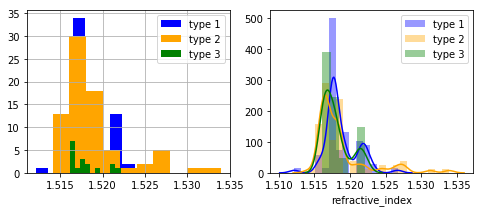

In [44]:
#Nothing too conclusive about the above. What about refraction index?

#coltoplot = ['refractive_index']
#print(glassdf[coltoplot].groupby(glassdf.type).mean())
#print(glassdf[coltoplot].groupby(glassdf.type).std())

#mean_ref_index = glassdf[coltoplot].groupby(glassdf.type).mean()

#Looking at the stuff below:
#1, 2 and 3 overlap a lot in terms of refraction index as well

plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
glassdf[glassdf.type == 1].refractive_index.hist(label="type 1", color='blue')
glassdf[glassdf.type == 2].refractive_index.hist(label="type 2", color='orange')
glassdf[glassdf.type == 3].refractive_index.hist(label="type 3", color='green')
plt.legend()

plt.subplot(1,2,2)
sb.distplot?
sb.distplot(glassdf[glassdf.type == 1].refractive_index, hist=True, color='blue', label="type 1")
sb.distplot(glassdf[glassdf.type == 2].refractive_index, hist=True, color='orange', label="type 2")
sb.distplot(glassdf[glassdf.type == 3].refractive_index, hist=True, color='green', label="type 3")
#sb.distplot(glassdf[glassdf.type == 5].refractive_index, hist=True, color='red', label="type 5")
#sb.distplot(glassdf[glassdf.type == 6].refractive_index, hist=True, color='purple', label="type 6")
#sb.distplot(glassdf[glassdf.type == 7].refractive_index, hist=True, color='magenta', label="type 7")
plt.legend()

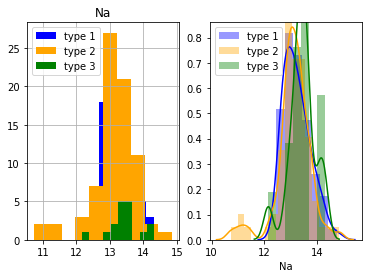

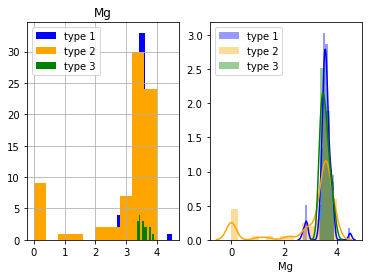

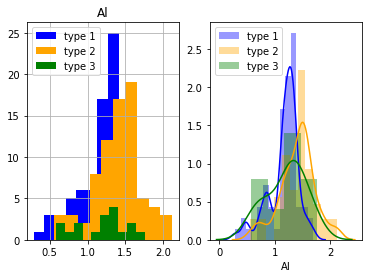

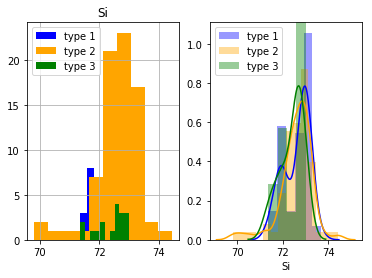

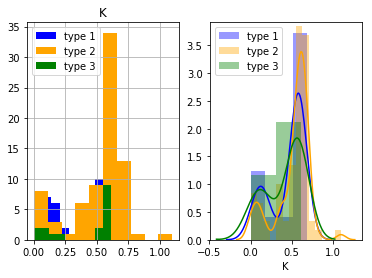

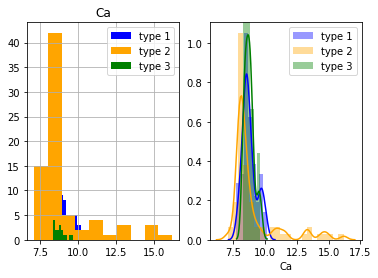

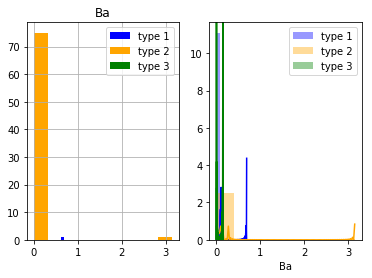

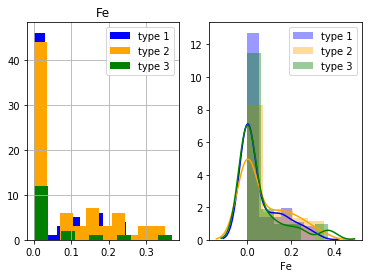

In [47]:
#Looking at various distributions.

atoms = ['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

for atom_kind in atoms:
    plt.figure()
    plt.subplot(1,2,1)
    glassdf[glassdf.type == 1][atom_kind].hist(label="type 1", color="blue")
    glassdf[glassdf.type == 2][atom_kind].hist(label="type 2", color = "orange")
    glassdf[glassdf.type == 3][atom_kind].hist(label="type 3", color = "green")
    plt.title(atom_kind)
    plt.legend()

    plt.subplot(1,2,2)
    sb.distplot(glassdf[glassdf.type == 1][atom_kind], hist=True, color='blue', label="type 1")
    sb.distplot(glassdf[glassdf.type == 2][atom_kind], hist=True, color='orange', label="type 2")
    sb.distplot(glassdf[glassdf.type == 3][atom_kind], hist=True, color='green', label="type 3")
    plt.legend()

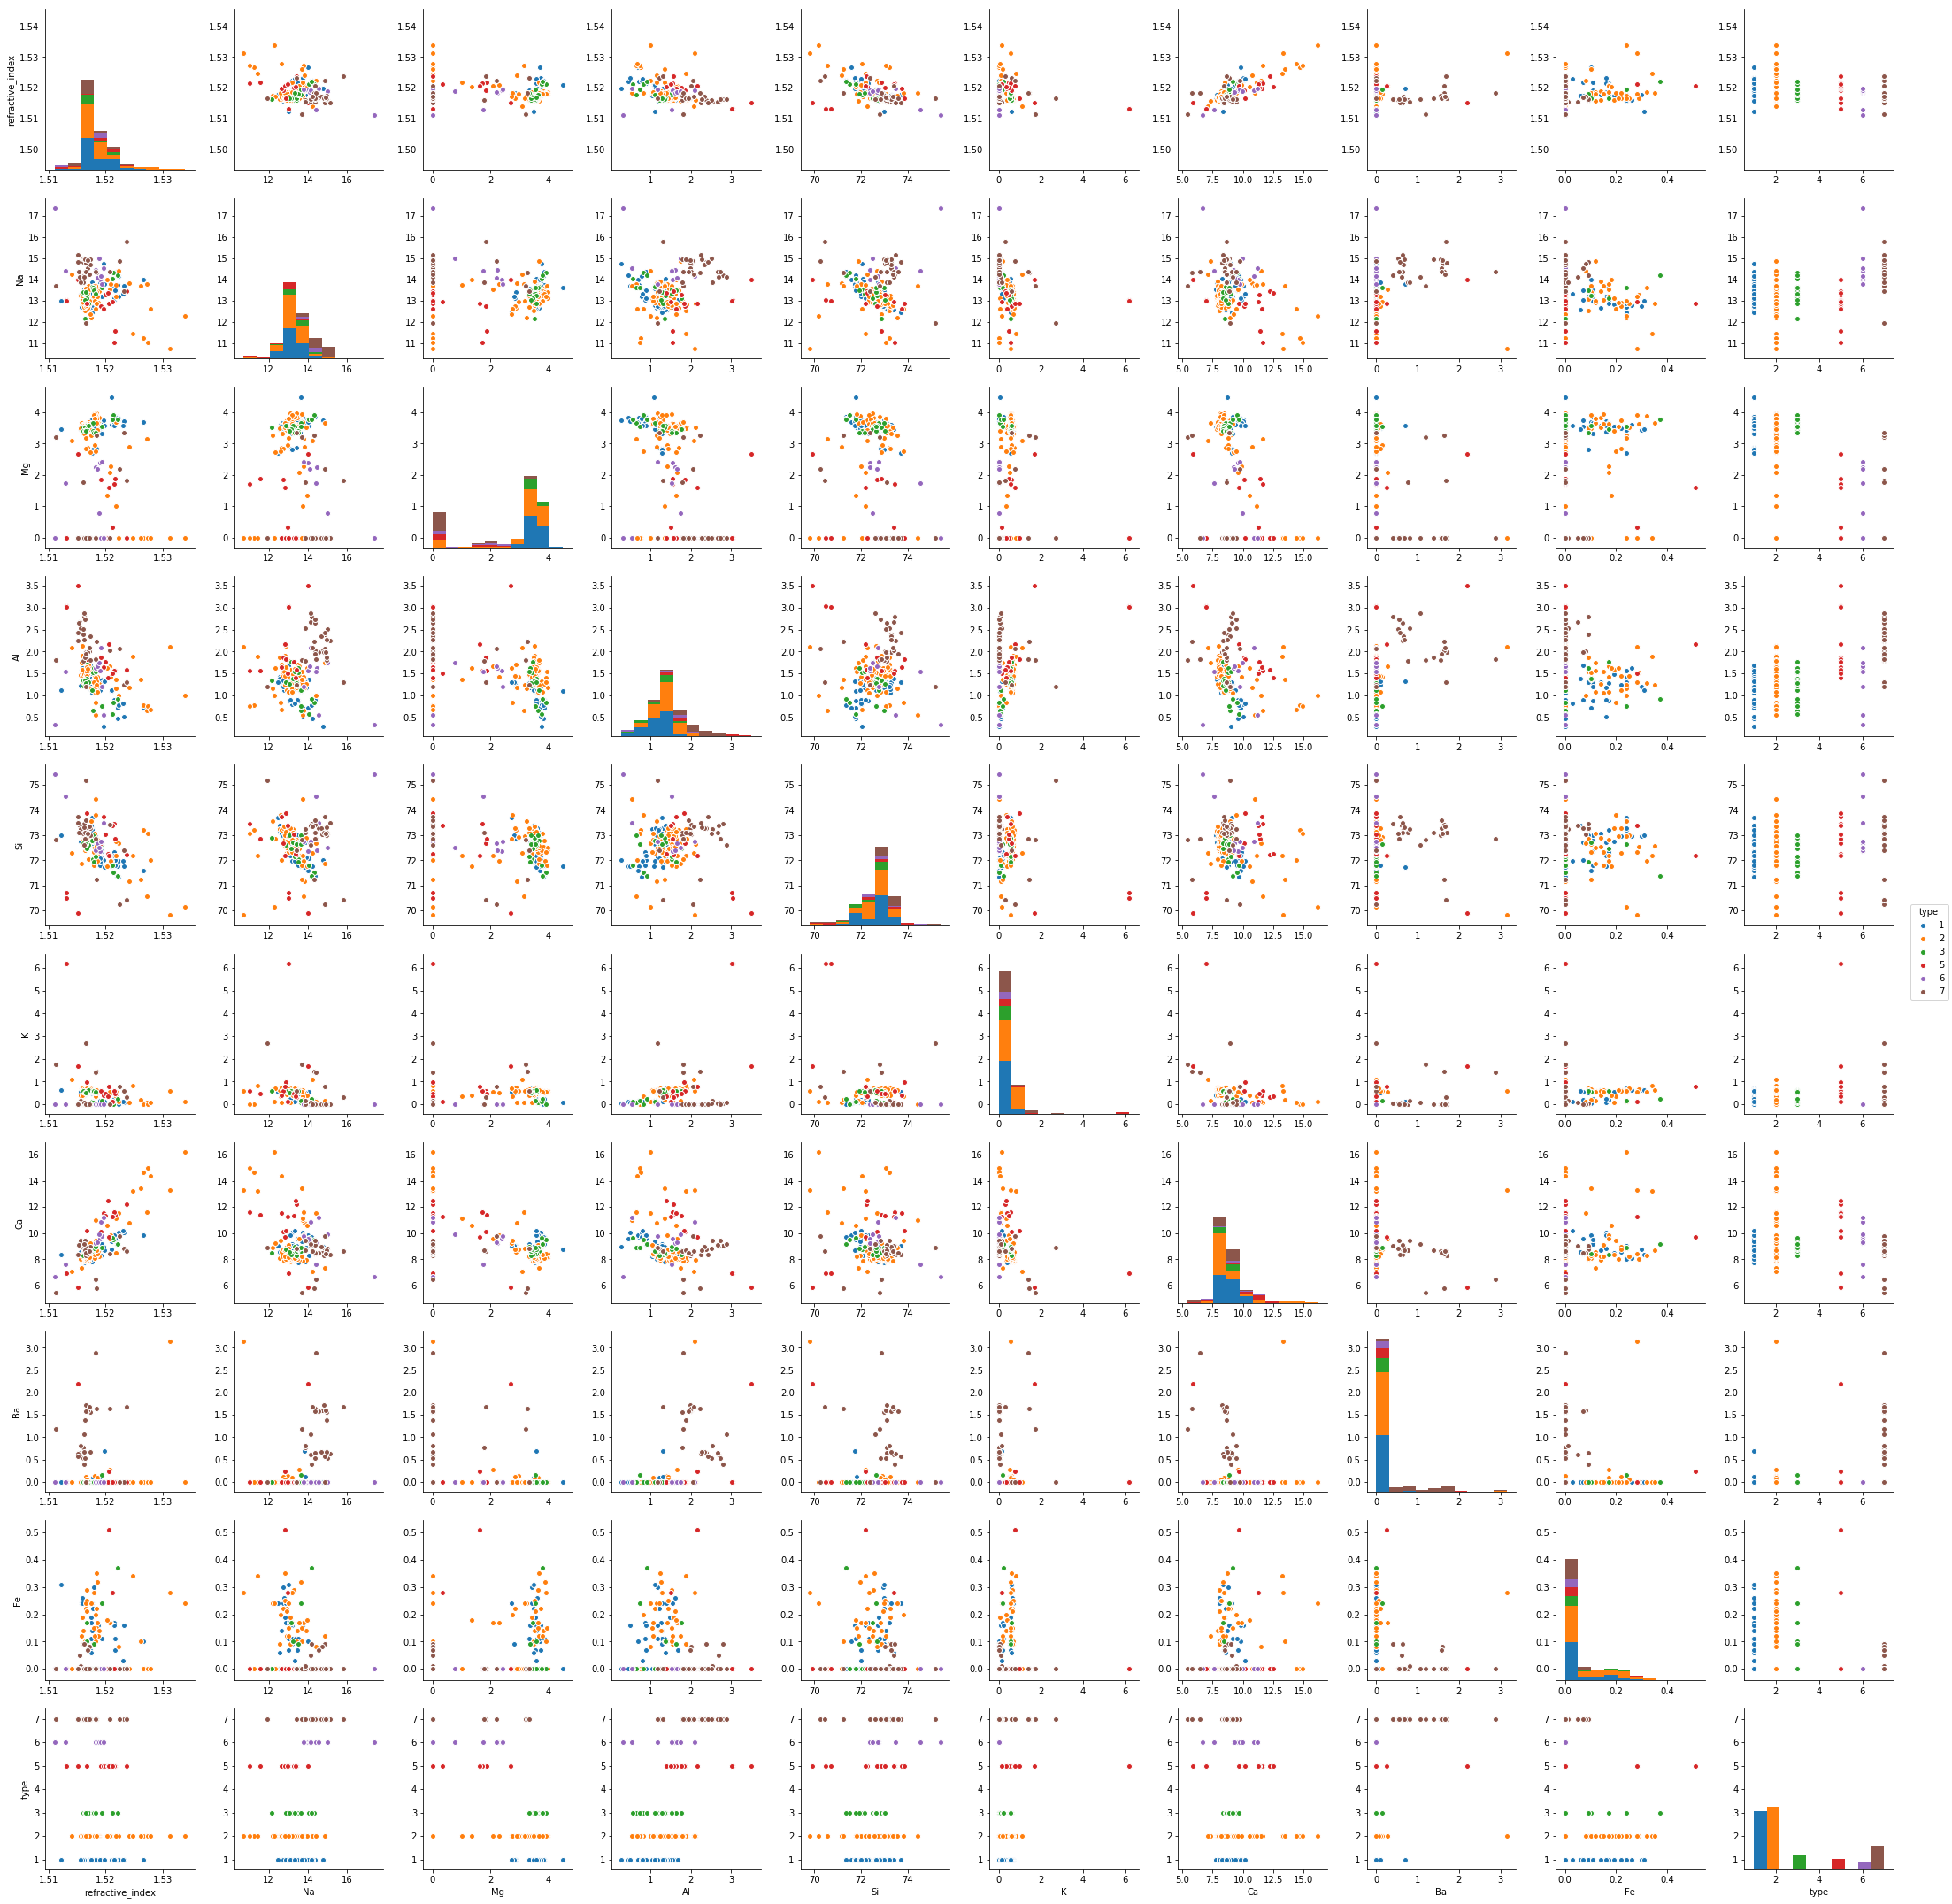

In [51]:
sb.pairplot(glassdf, hue="type", size=3)
plt.show()

#Univariate analysis does not reveal anything promising.
#What about two variables as opposed to one?



# Data transformation step

In [507]:
n_col = len(glassdf.columns)
X = glassdf.iloc[:, 0:n_col-1] #part of the dataset that will be our X for the dataset
Y = glassdf.iloc[:,n_col-1:n_col]

from sklearn import decomposition

#pca = decomposition.PCA(n_components=4)

#pca.fit(X)
#X = pca.transform(X)

del X["Si"]
del X["Ca"]
#del X["refractive_index"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

#making sure that the variables have mean 0 and variance 1 
sc = preprocessing.StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)




type    23
dtype: int64

In [483]:
#Calling a few models

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
   # ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegression(),
    #linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    #linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Naives Bayes
    naive_bayes.BernoulliNB(),
    #naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    #svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
   # discriminant_analysis.LinearDiscriminantAnalysis(),
   # discriminant_analysis.QuadraticDiscriminantAnalysis()
]

len(MLA)


14

In [516]:

#create table to compare different model metrics
MLA_columns = ['Name', 'Parameters','Train Accuracy Mean', 'Test Accuracy Mean', 'Test STD']
MLA_compare = pd.DataFrame(columns = MLA_columns)


In [518]:
from sklearn.model_selection import  StratifiedKFold, cross_val_score
kfolds = StratifiedKFold(n_splits=4, shuffle=True)

#from sklearn.metrics import f1_score

#cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7)
#divides the data into 10 parts, leaves 10% out on purpose

row_index = 0
for model in MLA:
    model_name = model.__class__.__name__
    cv_results = model_selection.cross_validate(model, X_train_std, np.ravel(Y_train), 
                                                cv  = kfolds, 
                                                return_train_score=True,
                                                scoring="accuracy"
                                                )
    
    
    MLA_compare.loc[row_index, 'Name'] = model_name
    MLA_compare.loc[row_index, 'Parameters'] = str(model.get_params())
    
    MLA_compare.loc[row_index, 'Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'Test Accuracy Mean'] = cv_results['test_score'].mean()   
    MLA_compare.loc[row_index, 'Test STD'] = cv_results['test_score'].std() 
    
    #model.fit(X_train_std, np.ravel(Y_train))
    
    row_index+=1

/Users/hudsonps/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/hudsonps/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/hudsonps/anaconda3/lib/pyth

In [519]:
MLA_compare.sort_values(by = ['Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

,Name,Parameters,Train Accuracy Mean,Test Accuracy Mean,Test STD
1,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",1,0.724908,0.0050533
4,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.829982,0.696942,0.0818025
2,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",1,0.683457,0.0423801
3,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.984332,0.66954,0.0824052
9,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.71358,0.665642,0.0449008
10,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.769467,0.650901,0.0327159
12,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",1,0.631324,0.0280729
8,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.680356,0.619543,0.0770369
11,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.668611,0.577024,0.0349637
13,ExtraTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",1,0.563352,0.0501522


In [251]:
#The table above suggests working towards optmizing extra_trees or random_forest

#Since I am more familiar with random_forest, I will work with that one instead.

#RandomForest further tuning

In [520]:

import numpy as np
#from sklearn.pipeline import make_pipeline, Pipeline

random_forest = ensemble.RandomForestClassifier()

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

#parameter space
param_space = {"max_depth": [3, None],
              "max_features": sp_randint(1, 4),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "n_estimators": sp_randint(50,500)}

n_iter_search = 10000

randsearch_rf = RandomizedSearchCV(random_forest,
                    param_distributions = param_space, 
                    n_iter = n_iter_search,
                                  cv = kfolds,
                                  n_jobs=-1,
                                  scoring='recall_weighted') 

randsearch_rf.fit(X_train_std, np.ravel(Y_train))

RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=True),
          error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10000, n_jobs=-1,
          param_distributions={'max_depth': [3, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a237baf98>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a21eae048>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a21eaec18>, 'bootstrap': [True, False], 'criterion': ['gini', 'entropy'

In [276]:

#grid_rf.score(X_test_std, Y_test)

In [538]:
#X_test_std.shape
Y_pred = randsearch_rf.predict(X_test_std)

In [547]:
accuracy_score(Y_test, Y_pred)

0.76923076923076927

In [548]:
randsearch_rf.best_score_

0.7651006711409396

In [536]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

(Y_test==3).sum()

type    4
dtype: int64

In [549]:
accuracy_score?
print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          1       0.78      0.91      0.84        23
          2       0.69      0.75      0.72        24
          3       1.00      0.25      0.40         4
          5       1.00      1.00      1.00         4
          6       1.00      0.40      0.57         5
          7       0.80      0.80      0.80         5

avg / total       0.79      0.77      0.75        65



Confusion matrix, without normalization
[[21  2  0  0  0  0]
 [ 6 18  0  0  0  0]
 [ 0  3  1  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  2  0  0  2  1]
 [ 0  1  0  0  0  4]]


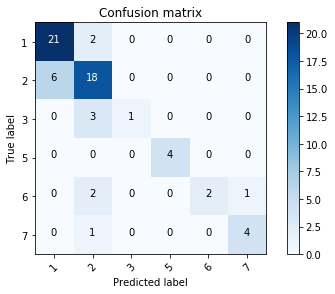

In [551]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, [1,2,3,5,6,7])

# Trying to improve performance with oversampling 

In [575]:
from imblearn.over_sampling import SMOTE, ADASYN

n_col = len(glassdf.columns)
X = glassdf.iloc[:, 0:n_col-1] #part of the dataset that will be our X for the dataset
Y = glassdf.iloc[:,n_col-1:n_col]

#X = preprocessing.scale(X)


X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, test_size = 0.3)

#sc2 = preprocessing.StandardScaler()
#sc2.fit(X_train)
#X_train = sc2.fit_transform(X_train)
#X_test = sc2.fit_transform(X_test)

sm = SMOTE(n_jobs=-1)

X_resampled, Y_resampled = sm.fit_sample(X2_train, np.ravel(Y2_train))

(array([ 51.,  51.,   0.,  51.,   0.,   0.,  51.,   0.,  51.,  51.]),
 array([ 1. ,  1.6,  2.2,  2.8,  3.4,  4. ,  4.6,  5.2,  5.8,  6.4,  7. ]),
 <a list of 10 Patch objects>)

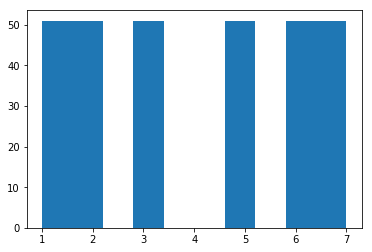

In [576]:
plt.hist(Y_resampled)

In [577]:
#X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_resampled, Y_resampled, 
                                                    

#sc2 = preprocessing.StandardScaler()
#sc2.fit(X_resampled)
#X_resampled = sc2.transform(X_resampled)


In [578]:
from sklearn.model_selection import  StratifiedKFold, cross_val_score
kfolds = StratifiedKFold(n_splits=4, shuffle=True)

random_forest2 = ensemble.RandomForestClassifier()

model = random_forest2

model_name = model.__class__.__name__
cv_results = model_selection.cross_validate(model, X_resampled, np.ravel(Y_resampled), 
                                                cv  = kfolds, 
                                                return_train_score=True)
print("train score: "+str(cv_results['train_score'].mean()))
print("test score: :"+str(cv_results['test_score'].mean())) 

random_forest2.fit(X_resampled, np.ravel(Y_resampled))

accuracy_score(Y_test, random_forest2.predict(X_test))


train score: 0.99353351327
test score: :0.862179487179


0.41538461538461541

In [579]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

#parameter space
param_space = {"max_depth": [3, None],
              "max_features": sp_randint(1, 7),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "n_estimators": sp_randint(50,500)}

n_iter_search = 10000

randsearch2_rf = RandomizedSearchCV(random_forest,
                    param_distributions = param_space, 
                    n_iter = n_iter_search,
                                  cv = kfolds) 

randsearch2_rf.fit(X_resampled, np.ravel(Y_resampled))

RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=True),
          error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10000, n_jobs=1,
          param_distributions={'max_depth': [3, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a20622320>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a23484470>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a234848d0>, 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']

In [598]:
accuracy_score(Y2_test, randsearch2_rf.predict(X2_test))

0.7384615384615385

In [582]:
print(classification_report(Y2_test, randsearch2_rf.predict(X2_test))) 

             precision    recall  f1-score   support

          1       0.68      0.57      0.62        23
          2       0.73      0.88      0.80        25
          3       0.00      0.00      0.00         3
          5       1.00      1.00      1.00         1
          6       1.00      1.00      1.00         3
          7       1.00      0.90      0.95        10

avg / total       0.74      0.74      0.73        65



Confusion matrix, without normalization
[[13  7  3  0  0  0]
 [ 3 22  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  3  0]
 [ 0  1  0  0  0  9]]


{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 495}

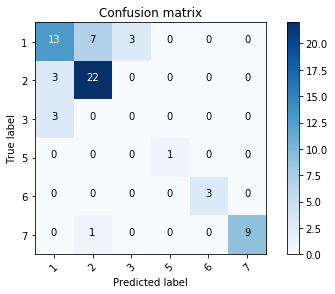

In [588]:
cm = confusion_matrix(Y2_test,randsearch2_rf.predict(X2_test) )
plot_confusion_matrix(cm, [1,2,3,5,6,7])

randsearch2_rf.best_params_

116    2
0      1
147    3
Name: type, dtype: int64


array([2, 1, 2])

# TRYING A GRADIENT BOOSTING ALGORITHM

In [584]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier?






In [613]:
n_col = len(glassdf.columns)
X3 = glassdf.iloc[:, 0:n_col-1] #part of the dataset that will be our X for the dataset
Y3 = glassdf.iloc[:,n_col-1:n_col]



del X3["Si"]
del X3["Ca"]
#del X["refractive_index"]

X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size = 0.3)

#making sure that the variables have mean 0 and variance 1 
sc = preprocessing.StandardScaler()
sc.fit(X3_train)
X3_train_std = sc.transform(X3_train)
X3_test_std = sc.transform(X3_test)


In [614]:
model_boost = GradientBoostingClassifier()

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform


#parameter space
param_space = {"loss": ["deviance"],
               "learning_rate": uniform(0.05, 2),
                "max_depth": [3, 5, 7],
                  "max_features": sp_randint(1, 4),
                  "min_samples_split": sp_randint(2, 11),
                  "min_samples_leaf": sp_randint(1, 11),
                  "n_estimators": sp_randint(50,500)}

n_iter_search = 1000

randsearch_boost = RandomizedSearchCV(model_boost,
                    param_distributions = param_space, 
                    n_iter = n_iter_search,
                                  cv = kfolds,
                                  n_jobs=-1,
                                  scoring='recall_weighted') 

randsearch_boost.fit(X3_train_std, np.ravel(Y3_train))

RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=True),
          error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
          fit_params=None, iid=True, n_iter=1000, n_jobs=-1,
          param_distributions={'loss': ['deviance'], 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a21c04630>, 'max_depth': [3, 5, 7], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a21c04a20>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_f...0x1a21c24780>, 'n_e

In [615]:
randsearch_boost.best_score_

0.79194630872483218

In [616]:
accuracy_score(Y3_test, randsearch_boost.predict(X3_test_std))

0.76923076923076927

In [617]:
print(classification_report(Y3_test, randsearch_boost.predict(X3_test_std))) 

             precision    recall  f1-score   support

          1       0.81      0.84      0.82        25
          2       0.71      0.81      0.76        21
          3       0.33      0.50      0.40         2
          5       0.00      0.00      0.00         4
          6       1.00      1.00      1.00         3
          7       0.89      0.80      0.84        10

avg / total       0.73      0.77      0.75        65



/Users/hudsonps/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization
[[21  2  2  0  0  0]
 [ 4 17  0  0  0  0]
 [ 0  1  1  0  0  0]
 [ 0  3  0  0  0  1]
 [ 0  0  0  0  3  0]
 [ 1  1  0  0  0  8]]


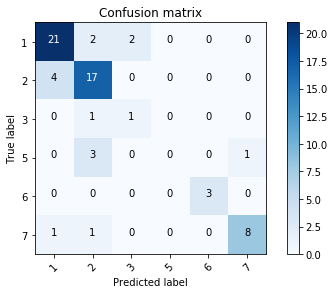

In [618]:
cm3 = confusion_matrix(Y3_test,randsearch_boost.predict(X3_test_std) )
plot_confusion_matrix(cm3, [1,2,3,5,6,7])

In [619]:
#Conclusions

#I did not notice systematic improvements over the random forest approach.